BUSINESS UNDERSTANDING

1.1 INTRODUCTION
Discovering what causes losses in a business is important in order to increase business profits. These losses can be brought by manufacturing defects.
Manufacturing defects are caused by errors made during the manufacturing process. These errors may include assembly errors, dimensional inaccuracies, dents, etc.
Manufacturing defects lead to reworking, recall ,scraping of products  which is coslty and also damages the companies reputation.
Manufacturing defects are categorised using severity level from minor level (which have minimal impacts) to critical ,which can cause harm.

1.2 PROJECT OVERVIEW
Analysing manufacturing defects in products will assist in determining losses to the business and using EDA will help visualise the data better

1.3 BUSINESS PROBLEM
1. Determine losses due to manufacturing defects
2. Find most effective inspection method of defect detection
3. Determine severity level of defects in order to classify them

1.4 OBJECTIVES
A. Use EDA to understand the data 
B. Determine severity level with highest cost of repairs
C. determine most effective method of inspection

1.5 STAKEHOLDERS
A. Manufacturing engineers
B. Quality assurance professionals
C. Researchers and Data Scientists


2 DATA PREPARATION

2.1 Importing libraries

In [2]:
#import all libraries
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline 



2.2 LOADING DATASETS

In [3]:
df = pd.read_csv(r"defects.csv")
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


3 DATA UNDERSTANDING


In [4]:
###___ANALYZING THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


The artist dataframe has 8 columns and each column has 1000 data entries with 2 columns having integer datatype, 5 with object data type and 1 with float datatypes

In [5]:
df.count()

defect_id            1000
product_id           1000
defect_type          1000
defect_date          1000
defect_location      1000
severity             1000
inspection_method    1000
repair_cost          1000
dtype: int64

Gives the non null values of each column

4. DATA CLEANING
4.1 CHECKING NULLS

In [6]:
# check for null values using 'isnull'
null_values = df.isnull()
null_series = null_values.sum()

for x in null_series.index:
    if null_series[x] == 0:
        print("There are no missing values in ", x, "column")
    else:
        print("There are missing values in ", x)
   

There are no missing values in  defect_id column
There are no missing values in  product_id column
There are no missing values in  defect_type column
There are no missing values in  defect_date column
There are no missing values in  defect_location column
There are no missing values in  severity column
There are no missing values in  inspection_method column
There are no missing values in  repair_cost column


There are no null values in any column

4.2 CHECK DUPLICATES

In [7]:
df.duplicated().sum()

0

There are no duplicated rows

In [8]:
type(df.loc[2,"defect_date"])

str

5 DATA VISUALISATION

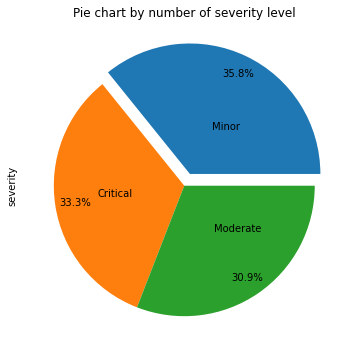

In [9]:
severity_count = df['severity'].value_counts()
explode = (0.1, 0, 0)
fig = plt.figure(figsize=(15,6))
severity_count.plot.pie(autopct='%1.1f%%', labeldistance=.4,  pctdistance=.85, explode=explode, textprops={'size': 'medium'})
plt.title("Pie chart by number of severity level")
plt.show;

The pie chart shows that most severity level of defects are minor 

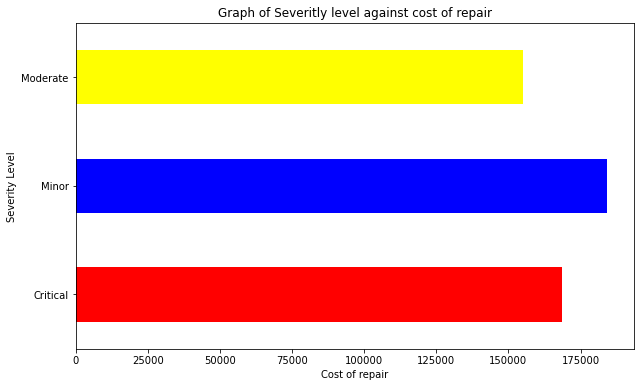

In [10]:
grup = df.groupby("severity")['repair_cost'].sum()
grup['Minor']


plt.figure(figsize=(10,6))

grup.plot.barh(color=['red', 'blue', "yellow"])

plt.ylabel("Severity Level") 
plt.xlabel("Cost of repair")

plt.title("Graph of Severitly level against cost of repair")
plt.show;


Manufacturing defects of minor severity level have the highest cost of repairs

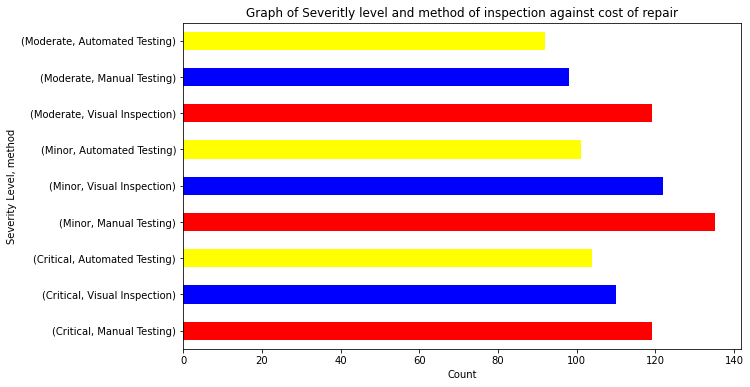

In [49]:
grup2 = df.groupby(["severity"])['inspection_method'].value_counts()


plt.figure(figsize=(10,6))

grup2.plot.barh(color=['red', 'blue', "yellow"])

plt.ylabel("Severity Level, method") 
plt.xlabel("Count")

plt.title("Graph of Severity level and method of inspection against cost of repair")
plt.show;


For Critical severity level manual Testing was the most used
For Moderate severity Visual inspection was most used
For Minor severity level manual Testing was most used